<a href="https://colab.research.google.com/github/nazalan/MScOnlab1/blob/main/3ActorGame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

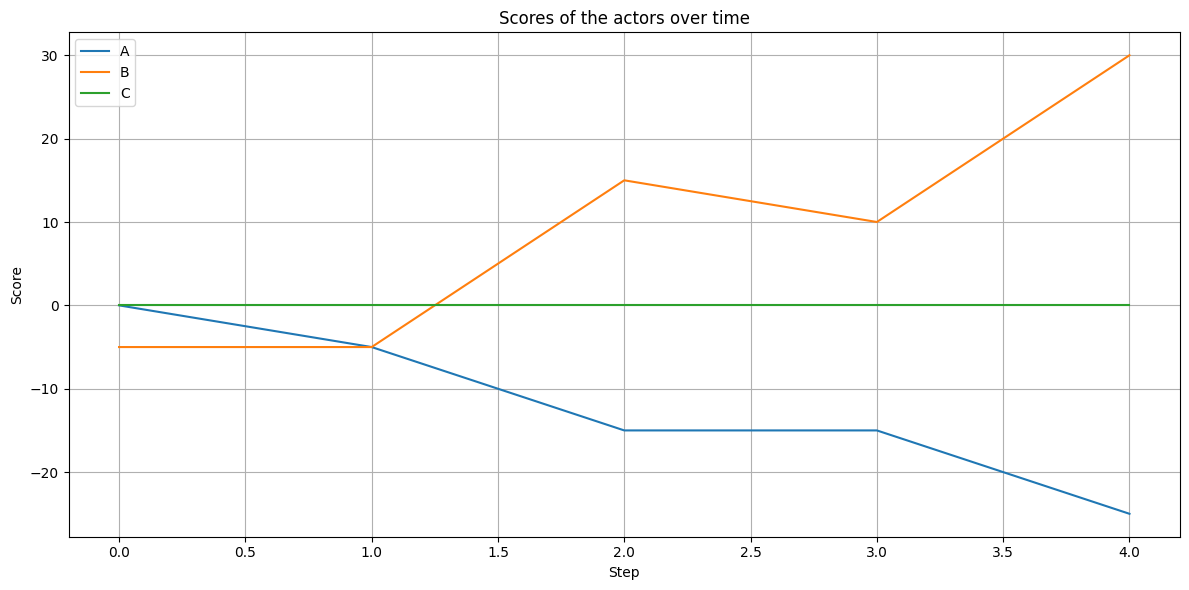

Decisions:
[0] B's decision: attack, failed attack (-5)
[1] C's decision: attack – cannot attack
[2] A's decision: attack, failed attack (-5)
[3] C's decision: attack – cannot attack
[4] B's decision: attack, successful attack on A (+20, -10)
[5] C's decision: attack – cannot attack
[6] C's decision: attack – cannot attack
[7] B's decision: attack, failed attack (-5)
[8] C's decision: attack – cannot attack
[9] B's decision: attack, successful attack on A (+20, -10)


In [60]:
# Everything is random

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Logging decisions
decisions_log = []

# Restarting the simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of the scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of the actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


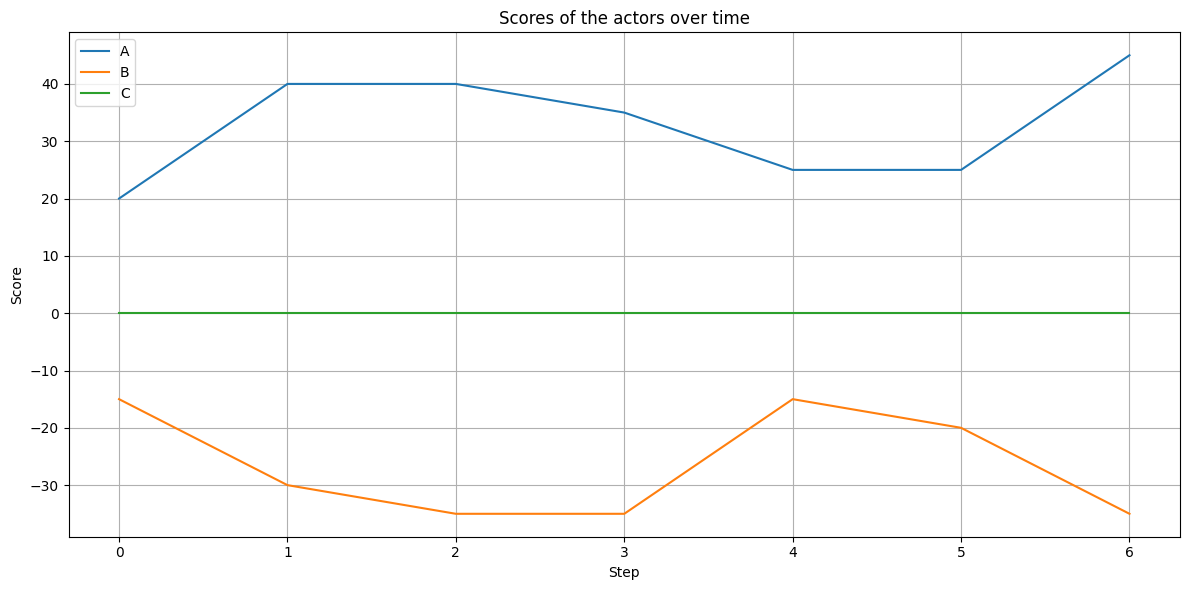

Decisions:
[0] A's decision: attack, successful attack on B (+20, -15)
[1] A's decision: attack, successful attack on B (+20, -15)
[2] B's decision: attack, failed attack (-5)
[3] C's decision: attack – cannot attack
[4] A's decision: attack, failed attack (-5)
[5] B's decision: attack, successful attack on A (+20, -10)
[6] C's decision: attack – cannot attack
[7] C's decision: attack – cannot attack
[8] B's decision: attack, failed attack (-5)
[9] A's decision: attack, successful attack on B (+20, -15)


In [47]:
# Dummy rational decision-making
import random
import matplotlib.pyplot as plt

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Decision logic: actors make rational decisions
def decide_action(discoverer):
    if scores[discoverer] < 50:
        # With a low score, prefer to attack
        return "attack"
    elif scores[discoverer] > 100:
        # With a high score, prefer to disclose
        return "disclose"
    else:
        # With a medium score, decide randomly
        return random.choice(["disclose", "sell", "attack"])

# Logging decisions
decisions_log = []

# Initializing simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of the actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


In [22]:
pip install nashpy

In [48]:
# Calculating Nash equilibrium
# Initializing payoff matrices
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B

# Searching for Nash equilibria from the payoff matrices
game = nash.Game(payoff_matrix_A, payoff_matrix_B)
equilibria = game.support_enumeration()  # Finding Nash equilibria

print("\nNash Equilibria:")
for eq in equilibria:
    print(eq)



Nash Equilibria:
(array([0., 1.]), array([0., 1.]))


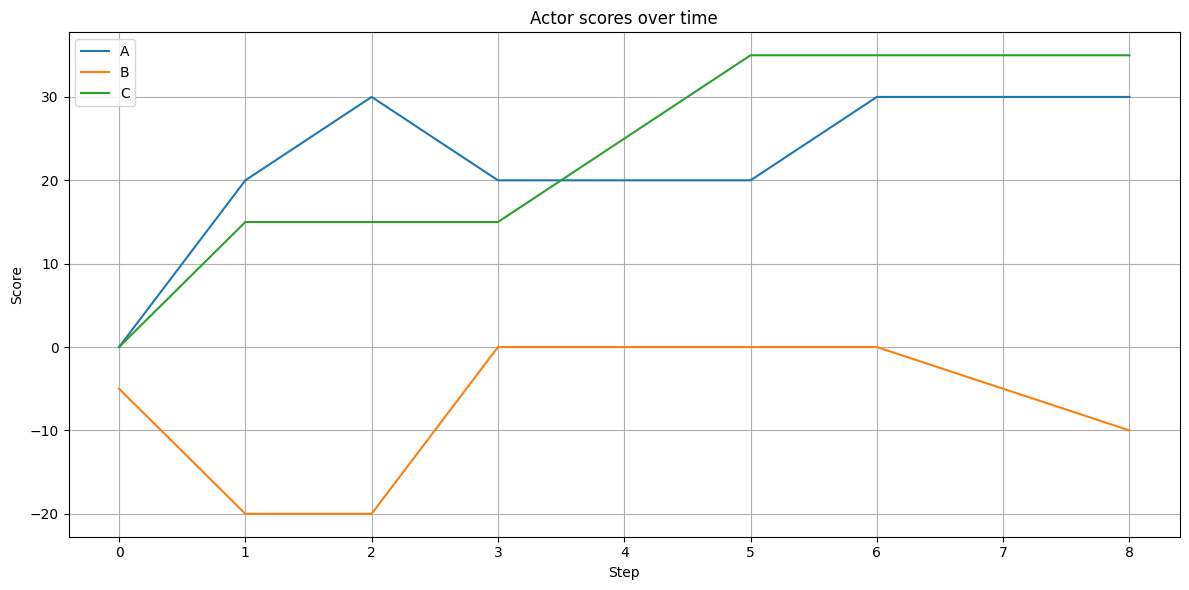

Decisions:
[0] B's decision: attack, failed attack (-5)
[1] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[2] A's decision: disclose (+10)
[3] B's decision: attack, successful attack on A (+20, -10)
[4] C's decision: disclose (+10)
[5] C's decision: disclose (+10)
[6] C's decision: attack – cannot attack
[7] A's decision: disclose (+10)
[8] B's decision: attack, failed attack (-5)
[9] B's decision: attack, failed attack (-5)


In [54]:
# Player C has no payoff matrix and decisions consider Nash equilibrium

import random
import matplotlib.pyplot as plt
import numpy as np

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Payoff matrices (for rational decisions)
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B

# Decision logic: actors make rational decisions
def decide_action_rational(discoverer):
    # Use A and B’s payoff matrices
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:
        # If the actor is C, choose randomly since C has no defined payoff matrix
        return random.choice(["disclose", "sell", "attack"])

    # Rational decision based on best payoff (maximize reward)
    # Choose the best action based on the payoff matrix
    best_choice = np.argmax(payoff_matrix[0])  # Select the best payoff
    return "disclose" if best_choice == 0 else "attack"

# Logging decisions
decisions_log = []

# Initialize simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_rational(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Actor scores over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))


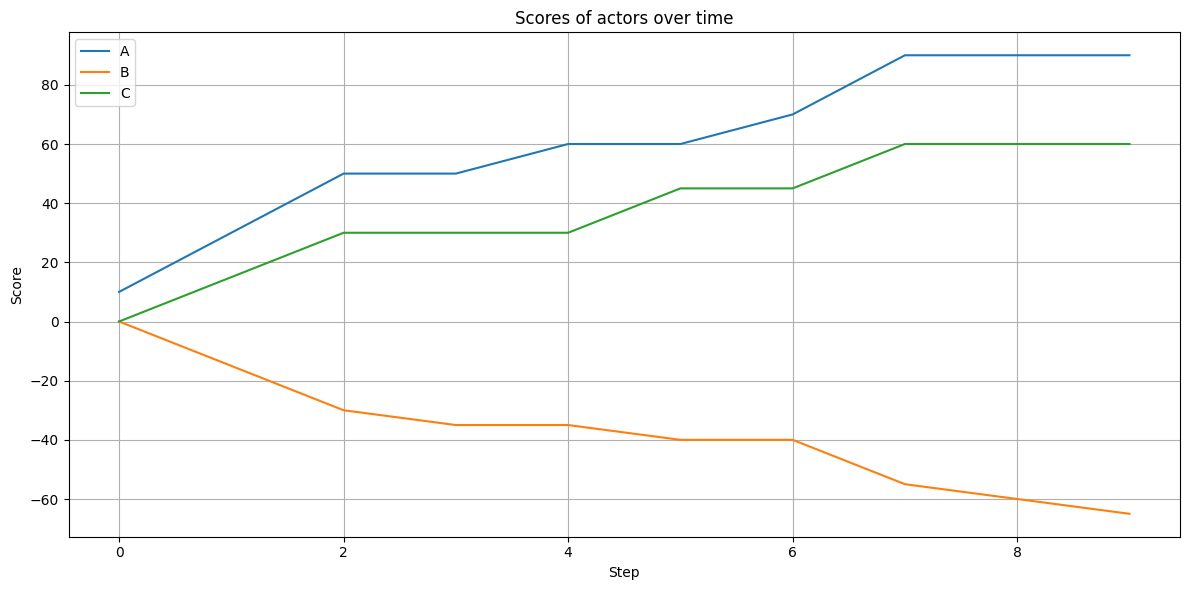

Decisions:
[0] A's decision: disclose (+10)
[1] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[2] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[3] B's decision: attack, failed attack (-5)
[4] A's decision: disclose (+10)
[5] C's decision: sell, sold to B (+15) → B attacks, failed attack (-5)
[6] A's decision: disclose (+10)
[7] C's decision: sell, sold to A (+15) → A attacks, successful attack on B (+20, -15)
[8] B's decision: attack, failed attack (-5)
[9] B's decision: attack, failed attack (-5)


In [58]:
# Introducing a payoff matrix for player C

import random
import matplotlib.pyplot as plt
import numpy as np

# Actors and default values
actors = ["A", "B", "C"]
num_steps = 10  # Number of steps
disclose_reward = 10
sell_reward = 15
attack_gain = 20
attack_loss = {"A": -10, "B": -15}
attack_fail_penalty = -5
attack_success_chance = {"A": 0.7, "B": 0.5}

# Payoff matrices (for rational decisions)
payoff_matrix_A = np.array([[5, 0], [10, 2]])  # Payoff matrix for A
payoff_matrix_B = np.array([[5, 10], [0, 2]])  # Payoff matrix for B
payoff_matrix_C = np.array([[3, 7], [8, 4]])   # Payoff matrix for C (C cannot attack)

# Decision logic: actors make rational decisions
def decide_action_rational(discoverer):
    # Payoff matrices for A, B, and C
    if discoverer == "A":
        payoff_matrix = payoff_matrix_A
    elif discoverer == "B":
        payoff_matrix = payoff_matrix_B
    else:  # In case of C
        payoff_matrix = payoff_matrix_C

    # Make a rational decision based on the best choice (maximum payoff)
    best_choice = np.argmax(payoff_matrix[0])  # Select the best payoff
    if discoverer == "C":
        # C cannot attack, can only choose between "disclose" and "sell"
        return "disclose" if best_choice == 0 else "sell"
    return "disclose" if best_choice == 0 else "attack"

# Logging decisions
decisions_log = []

# Initialize simulation data
scores = {"A": 0, "B": 0, "C": 0}
history = {"A": [], "B": [], "C": []}

# Simulation steps
for step in range(num_steps):
    discoverer = random.choice(actors)
    action = decide_action_rational(discoverer)
    log_entry = f"[{step}] {discoverer}'s decision: {action}"

    if action == "disclose":
        scores[discoverer] += disclose_reward
        log_entry += f" (+{disclose_reward})"

    elif action == "sell":
        scores[discoverer] += sell_reward
        buyer = random.choice(["A", "B"])
        log_entry += f", sold to {buyer} (+{sell_reward})"
        discoverer = buyer
        action = "attack"
        log_entry += f" → {discoverer} attacks"

    if action == "attack":
        if discoverer not in ["A", "B"]:
            decisions_log.append(log_entry + " – cannot attack")
            continue
        target = "B" if discoverer == "A" else "A"
        success_prob = attack_success_chance[discoverer]
        success = random.random() < success_prob
        if success:
            scores[discoverer] += attack_gain
            scores[target] += attack_loss[target]
            log_entry += f", successful attack on {target} (+{attack_gain}, {attack_loss[target]})"
        else:
            scores[discoverer] += attack_fail_penalty
            log_entry += f", failed attack ({attack_fail_penalty})"

    decisions_log.append(log_entry)

    for actor in actors:
        history[actor].append(scores[actor])

# Visualization of scores
plt.figure(figsize=(12, 6))
for actor in actors:
    plt.plot(history[actor], label=f"{actor}")
plt.xlabel("Step")
plt.ylabel("Score")
plt.title("Scores of actors over time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Decisions:")
print("\n".join(decisions_log))
